# Подключение необходимых библиотек и датасетов

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [3]:
train = pd.read_csv("/kaggle/input/leopard-challenge-regression/train.csv")
train.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,0.0,181.0,NaN,NaN,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019.0,33671
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,18292
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,11545
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,3742
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,3250


# Просмотр данных

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18373 non-null  object 
 1   Address        18373 non-null  object 
 2   Rooms          18373 non-null  int64  
 3   Type           18373 non-null  object 
 4   Price          18373 non-null  float64
 5   Method         18373 non-null  object 
 6   SellerG        18373 non-null  object 
 7   Date           18373 non-null  object 
 8   Distance       18373 non-null  float64
 9   Postcode       18373 non-null  float64
 10  Bedroom2       14905 non-null  float64
 11  Bathroom       14903 non-null  float64
 12  Car            14798 non-null  float64
 13  Landsize       13579 non-null  float64
 14  BuildingArea   7750 non-null   float64
 15  YearBuilt      8944 non-null   float64
 16  CouncilArea    18372 non-null  object 
 17  Lattitude      15041 non-null  float64
 18  Longti

Преобразуем дату в тип datetime и после сделаем из него новые фичи

In [5]:
train['Date'] = pd.to_datetime(train['Date'].apply(str).str.strip(), 
                               dayfirst=True, errors='coerce', infer_datetime_format=True)

/tmp/ipykernel_254/3928742619.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  train['Date'] = pd.to_datetime(train['Date'].apply(str).str.strip(),


In [6]:
train['Date'].isna().sum()

0

In [7]:
train.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          3468
Bathroom          3470
Car               3575
Landsize          4794
BuildingArea     10623
YearBuilt         9429
CouncilArea          1
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
id                   0
dtype: int64

In [8]:
train['Date'].value_counts(dropna=False)

Date
2017-05-27    610
2017-09-23    591
2017-09-16    544
2017-06-03    524
2017-08-26    522
2017-06-17    486
2016-11-27    455
2017-09-03    450
2017-08-12    449
2017-06-24    448
2017-09-09    446
2017-08-19    441
2017-03-04    416
2017-02-25    414
2016-12-10    407
2017-07-29    383
2016-11-12    381
2017-07-01    381
2017-03-18    375
2016-12-03    360
2016-10-15    359
2017-07-08    351
2017-07-22    350
2017-04-08    348
2016-06-18    343
2016-05-28    340
2017-05-20    340
2016-11-19    336
2017-07-15    336
2016-10-08    317
2017-05-13    311
2016-05-07    309
2016-09-17    302
2016-08-28    302
2016-09-24    298
2016-09-10    294
2016-06-04    283
2016-06-27    277
2017-04-29    273
2016-09-03    268
2016-05-22    266
2016-04-16    266
2016-05-14    250
2016-08-22    240
2016-11-07    239
2016-07-30    207
2017-05-06    190
2016-08-06    190
2017-04-22    180
2016-07-16    177
2016-08-13    175
2016-07-26    167
2016-04-23    135
2017-02-11    111
2016-06-12     58
2017-

Создадим новые фичи

In [9]:
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['day'] = train['Date'].dt.day
train['dayofweek'] = train['Date'].dt.dayofweek
train['is_weekend'] = (train['Date'].dt.dayofweek >= 5).astype(int)
train['quarter'] = train['Date'].dt.quarter
train['weekofyear'] = train['Date'].dt.isocalendar().week.astype(int)

In [10]:
train = train.drop('Date', axis=1)

Довольно большое количество пропусков у BuildingArea и YearBuilt, позже подумаем что делать с этими пропусками, так как их много но и заполнить их средним такое себе

In [11]:
train.isna().mean().sort_values(ascending=False)

BuildingArea     0.578185
YearBuilt        0.513199
Landsize         0.260926
Car              0.194579
Bathroom         0.188864
Bedroom2         0.188755
Lattitude        0.181353
Longtitude       0.181353
Propertycount    0.000054
Regionname       0.000054
CouncilArea      0.000054
Suburb           0.000000
Postcode         0.000000
Method           0.000000
SellerG          0.000000
Distance         0.000000
Price            0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
id               0.000000
year             0.000000
month            0.000000
day              0.000000
dayofweek        0.000000
is_weekend       0.000000
quarter          0.000000
weekofyear       0.000000
dtype: float64

In [12]:
train['Car'].value_counts(dropna=False)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Car
2.0     6181
1.0     6058
NaN     3575
0.0     1050
3.0      808
4.0      549
5.0       66
6.0       62
8.0       12
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [13]:
train.groupby('Suburb')['Car'].agg(['count', 'mean'])

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,count,mean
Suburb,,
Abbotsford,61,0.950820
Aberfeldie,47,1.957447
Airport West,71,1.619718
Albanvale,8,2.125000
Albert Park,69,0.753623
...,...,...
Wyndham Vale,5,1.600000
Yallambie,26,1.769231
Yarra Glen,1,1.000000


In [14]:
train.corr(numeric_only=True)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Longtitude,Propertycount,id,year,month,day,dayofweek,is_weekend,quarter,weekofyear
Rooms,1.000000,0.499639,0.289296,0.063347,0.948558,0.597412,0.412486,0.026276,0.126645,-0.056456,...,0.092957,-0.091478,0.004325,0.072813,0.014470,0.013320,0.034298,0.033583,0.001646,0.016063
Price,0.499639,1.000000,-0.172521,0.097487,0.477260,0.463648,0.238572,0.037681,0.094909,-0.326959,...,0.198808,-0.053093,-0.004071,-0.012569,0.009776,-0.003015,0.030498,0.026442,-0.012329,0.009251
Distance,0.289296,-0.172521,1.000000,0.445167,0.297242,0.134004,0.261796,0.025639,0.094182,0.250387,...,0.235059,-0.062055,0.009637,0.239936,0.029647,0.015184,0.054075,0.061373,0.031866,0.032205
Postcode,0.063347,0.097487,0.445167,1.000000,0.065251,0.116897,0.057261,0.025634,0.051450,0.045513,...,0.433615,0.043574,-0.002026,0.107049,0.026620,0.002916,0.034048,0.037194,0.021135,0.027392
Bedroom2,0.948558,0.477260,0.297242,0.065251,1.000000,0.589781,0.409478,0.026252,0.124850,-0.044475,...,0.096736,-0.081073,0.003916,0.104232,0.032170,0.009303,0.040984,0.040501,0.020129,0.033672
Bathroom,0.597412,0.463648,0.134004,0.116897,0.589781,1.000000,0.324802,0.037824,0.114884,0.161851,...,0.118039,-0.051356,0.002075,0.043767,0.029815,-0.009113,0.036383,0.036751,0.016092,0.028919
Car,0.412486,0.238572,0.261796,0.057261,0.409478,0.324802,1.000000,0.026891,0.096393,0.109409,...,0.063781,-0.023414,0.015916,0.082606,0.031969,0.005724,0.042007,0.037276,0.024149,0.033040
Landsize,0.026276,0.037681,0.025639,0.025634,0.026252,0.037824,0.026891,1.000000,0.500572,0.037400,...,0.011460,-0.007011,0.003446,0.029920,-0.003489,-0.002897,0.008810,0.009453,-0.003925,-0.003805
BuildingArea,0.126645,0.094909,0.094182,0.051450,0.124850,0.114884,0.096393,0.500572,1.000000,0.026426,...,-0.021007,-0.027900,-0.003004,0.012071,0.012042,0.008194,0.005413,0.006541,0.005100,0.013183
YearBuilt,-0.056456,-0.326959,0.250387,0.045513,-0.044475,0.161851,0.109409,0.037400,0.026426,1.000000,...,-0.002722,0.007249,0.019772,0.129235,-0.003119,-0.007267,0.008479,0.008942,0.002304,-0.003394


<Axes: >

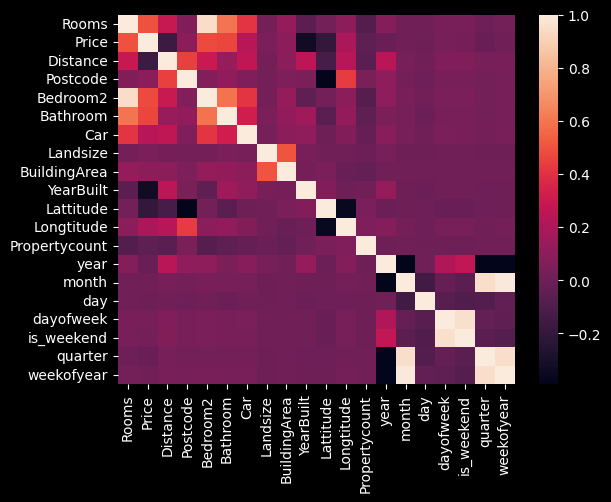

In [15]:
sns.heatmap(train.drop('id', axis=1).corr(numeric_only=True))

In [16]:
train.drop('id', axis=1).corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.499639
Bedroom2         0.477260
Bathroom         0.463648
Car              0.238572
Longtitude       0.198808
Postcode         0.097487
BuildingArea     0.094909
Landsize         0.037681
dayofweek        0.030498
is_weekend       0.026442
month            0.009776
weekofyear       0.009251
day             -0.003015
quarter         -0.012329
year            -0.012569
Propertycount   -0.053093
Distance        -0.172521
Lattitude       -0.206103
YearBuilt       -0.326959
Name: Price, dtype: float64

После быстрого просмотра корреляции я заметил, что:
BuildingArea и YearBuilt в которых много пропусков, сильно коррелируют с целевым признаком, значит попробуем аккуратно заполнить их значениями

# Заполнение пропусков

In [17]:
train.isna().mean().sort_values(ascending=False)

BuildingArea     0.578185
YearBuilt        0.513199
Landsize         0.260926
Car              0.194579
Bathroom         0.188864
Bedroom2         0.188755
Lattitude        0.181353
Longtitude       0.181353
Propertycount    0.000054
Regionname       0.000054
CouncilArea      0.000054
Suburb           0.000000
Postcode         0.000000
Method           0.000000
SellerG          0.000000
Distance         0.000000
Price            0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
id               0.000000
year             0.000000
month            0.000000
day              0.000000
dayofweek        0.000000
is_weekend       0.000000
quarter          0.000000
weekofyear       0.000000
dtype: float64

## Заполнение пропусков BuildingArea

In [18]:
train.groupby(by=['Type', 'Rooms'])['BuildingArea'].agg(['count', 'mean'])

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


count        mean
Type Rooms                   
h    1         21   83.619048
     2        686  103.275292
     3       2538  141.177757
     4       1575  211.066396
     5        366  398.942778
     6         37  276.635135
     7          6  340.423333
     8          4  256.000000
     9          0         NaN
     10         0         NaN
     12         0         NaN
t    1          9   69.666667
     2        230  117.338391
     3        421  136.512583
     4        109  194.891284
     5          3  159.666667
u    1        346   52.864855
     2       1119   80.701171
     3        267  117.036517
     4         12  150.083333
     6          1  171.000000
     8          0         NaN

In [19]:
train.groupby(by=['Type', 'Rooms'])['BuildingArea'].transform(lambda x: x.fillna(x.median()))

0         97.0
1         79.0
2        150.0
3        130.0
4        142.0
         ...  
18368    130.0
18369    105.0
18370    225.0
18371    130.0
18372    140.0
Name: BuildingArea, Length: 18373, dtype: float64

In [20]:
train['BuildingArea'] = train.groupby(by=['Type', 'Rooms'])['BuildingArea'].transform(lambda x: x.fillna(x.median()))

In [21]:
train['BuildingArea'].notna().count()

18373

In [22]:
train['BuildingArea'].isna().mean()

0.00043542154248081425

In [23]:
train[train['BuildingArea'].isna()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Regionname,Propertycount,id,year,month,day,dayofweek,is_weekend,quarter,weekofyear
2048,Burwood,445 Warrigal Rd,10,h,1960000.0,S,Kay,11.7,3125.0,NaN,...,Southern Metropolitan,5678.0,32521,2016,11,27,6,1,4,47
2530,Coburg,35 The Grove,8,u,2250000.0,PI,Peter,7.8,3058.0,4.0,...,Northern Metropolitan,11204.0,15386,2017,3,4,5,1,1,9
5793,Oakleigh South,17 Windsor Av,9,h,1380000.0,S,Ray,14.7,3167.0,NaN,...,South-Eastern Metropolitan,3692.0,17395,2016,9,10,5,1,3,36
5840,Parkville,42 Park Dr,8,u,3210000.0,S,Kelly,2.6,3052.0,NaN,...,Northern Metropolitan,2309.0,16319,2016,12,10,5,1,4,49
5846,Parkville,84 Flemington Rd,10,h,2800000.0,VB,Nelson,2.6,3052.0,NaN,...,Northern Metropolitan,2309.0,30325,2016,4,16,5,1,2,15
10059,Hawthorn,10 Berkeley St,12,h,4700000.0,PI,Property,4.6,3122.0,NaN,...,Southern Metropolitan,11308.0,29167,2017,5,20,5,1,2,20
12543,Clayton,1 Beddoe Av,10,h,2115000.0,S,Harcourts,16.7,3168.0,NaN,...,South-Eastern Metropolitan,5837.0,11771,2017,6,24,5,1,2,25
14342,Bundoora,5 Ball Ct,10,h,900000.0,PI,Ray,12.1,3083.0,10.0,...,Northern Metropolitan,10175.0,26720,2017,7,15,5,1,3,28


In [24]:
train['BuildingArea'] = train.groupby('Type')['BuildingArea'].transform(lambda x: x.fillna(x.median()))

In [25]:
train['BuildingArea'].isna().mean()

0.0

Пропуски в BuildingArea заполнены

## Заполнение пропусков YearBuilt

In [26]:
train.isna().mean().sort_values(ascending=False)

YearBuilt        0.513199
Landsize         0.260926
Car              0.194579
Bathroom         0.188864
Bedroom2         0.188755
Longtitude       0.181353
Lattitude        0.181353
Regionname       0.000054
CouncilArea      0.000054
Propertycount    0.000054
Type             0.000000
Suburb           0.000000
Postcode         0.000000
Method           0.000000
SellerG          0.000000
Distance         0.000000
Price            0.000000
Address          0.000000
Rooms            0.000000
BuildingArea     0.000000
id               0.000000
year             0.000000
month            0.000000
day              0.000000
dayofweek        0.000000
is_weekend       0.000000
quarter          0.000000
weekofyear       0.000000
dtype: float64

In [27]:
train.groupby('Suburb')['YearBuilt'].median()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Suburb
Abbotsford      1945.0
Aberfeldie      1980.0
Airport West    1982.5
Albanvale       1980.0
Albert Park     1900.0
                 ...  
Wyndham Vale    2005.0
Yallambie       1978.0
Yarra Glen      1975.0
Yarraville      1950.0
croydon            NaN
Name: YearBuilt, Length: 329, dtype: float64

In [28]:
train['YearBuilt'] = train.groupby('Suburb')['YearBuilt'].transform(lambda x: x.fillna(x.median()))

In [29]:
train['YearBuilt'].isna().mean()

0.0028846677189353943

После заполнения по Suburb осталось немного пропусков, заполним их обычной медианой

In [30]:
train['YearBuilt'] = train['YearBuilt'].fillna(train['YearBuilt'].median())

In [31]:
train['YearBuilt'].isna().mean()

0.0

In [32]:
train.isna().mean().sort_values(ascending=False)

Landsize         0.260926
Car              0.194579
Bathroom         0.188864
Bedroom2         0.188755
Lattitude        0.181353
Longtitude       0.181353
CouncilArea      0.000054
Regionname       0.000054
Propertycount    0.000054
Rooms            0.000000
Type             0.000000
Suburb           0.000000
Postcode         0.000000
Method           0.000000
SellerG          0.000000
Distance         0.000000
Price            0.000000
Address          0.000000
YearBuilt        0.000000
BuildingArea     0.000000
id               0.000000
year             0.000000
month            0.000000
day              0.000000
dayofweek        0.000000
is_weekend       0.000000
quarter          0.000000
weekofyear       0.000000
dtype: float64

Посмотрим линейные корреляции еще раз

In [33]:
train.drop('id', axis=1).corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.499639
Bedroom2         0.477260
Bathroom         0.463648
Car              0.238572
Longtitude       0.198808
BuildingArea     0.103449
Postcode         0.097487
Landsize         0.037681
dayofweek        0.030498
is_weekend       0.026442
month            0.009776
weekofyear       0.009251
day             -0.003015
quarter         -0.012329
year            -0.012569
Propertycount   -0.053093
Distance        -0.172521
Lattitude       -0.206103
YearBuilt       -0.257961
Name: Price, dtype: float64

Установим и попробуем посмотреть корреляции в phik

In [34]:
! pip install phik

In [35]:
import phik

In [ ]:
phik_overwiev = train.drop(['id'], axis=1).phik_matrix()

In [ ]:
phik_overwiev['Price'].sort_values(ascending=False)

Результаты phik: \
Price            1.000000 \
Address          0.914613 \
Suburb           0.610125\
Rooms            0.550332\
CouncilArea      0.507869\
Type             0.504038\
SellerG          0.479570\
Bathroom         0.395127\
Bedroom2         0.382636\
Lattitude        0.367300\
Longtitude       0.352557\
Car              0.343798\
Regionname       0.315454\
Postcode         0.285717\
YearBuilt        0.256425\
Propertycount    0.255556\
Distance         0.232145\
Method           0.173730\
month            0.126060\
weekofyear       0.119981\
day              0.076129\
quarter          0.061177\
Landsize         0.053295\
is_weekend       0.031988\
dayofweek        0.030093\
year             0.022828\
BuildingArea     0.000000\
Name: Price, dtype: float64

In [38]:
train.drop('id', axis=1).corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.499639
Bedroom2         0.477260
Bathroom         0.463648
Car              0.238572
Longtitude       0.198808
BuildingArea     0.103449
Postcode         0.097487
Landsize         0.037681
dayofweek        0.030498
is_weekend       0.026442
month            0.009776
weekofyear       0.009251
day             -0.003015
quarter         -0.012329
year            -0.012569
Propertycount   -0.053093
Distance        -0.172521
Lattitude       -0.206103
YearBuilt       -0.257961
Name: Price, dtype: float64

## Заполнение пропусков Landsize

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18373 non-null  object 
 1   Address        18373 non-null  object 
 2   Rooms          18373 non-null  int64  
 3   Type           18373 non-null  object 
 4   Price          18373 non-null  float64
 5   Method         18373 non-null  object 
 6   SellerG        18373 non-null  object 
 7   Distance       18373 non-null  float64
 8   Postcode       18373 non-null  float64
 9   Bedroom2       14905 non-null  float64
 10  Bathroom       14903 non-null  float64
 11  Car            14798 non-null  float64
 12  Landsize       13579 non-null  float64
 13  BuildingArea   18373 non-null  float64
 14  YearBuilt      18373 non-null  float64
 15  CouncilArea    18372 non-null  object 
 16  Lattitude      15041 non-null  float64
 17  Longtitude     15041 non-null  float64
 18  Region

In [40]:
train['Landsize'] = train.groupby(['Suburb', 'Type'])['Landsize'].transform(lambda x: x.fillna(x.median()))

In [41]:
train['Landsize'].isna().mean()

0.005442769281010178

In [42]:
train['Landsize'] = train['Landsize'].fillna(train['Landsize'].median())

In [43]:
train['Landsize'].isna().mean()

0.0

## Заполнение пропусков Car

Заполним по типу дома и количеству комнат, так как обычно чем больше комнат и больше дом, тем больше нужно парковочных мест

In [44]:
train['Car'] = train.groupby(['Type', 'Rooms'])['Car'].transform(lambda x: x.fillna(x.median()))

In [45]:
train['Car'].isna().mean()

0.00010885538562020356

In [46]:
train['Car'] = train['Car'].fillna(train['Car'].median())

## Заполнение пропусков Bathroom

In [47]:
train['Bathroom'] = train.groupby(['Type', 'Rooms'])['Bathroom'].transform(lambda x: x.fillna(x.median()))

In [48]:
train['Bathroom'].isna().mean()

0.00010885538562020356

## Заполнение пропусков Bedroom2

In [49]:
train['Bedroom2'] = train.groupby(['Type', 'Rooms'])['Bedroom2'].transform(lambda x: x.fillna(x.median()))

In [50]:
train['Bedroom2'].isna().mean()

0.00010885538562020356

In [51]:
train['Bedroom2'] = train['Bedroom2'].fillna(train['Bedroom2'].median())

In [52]:
train['Bedroom2'].isna().mean()

0.0

Посмотрим какие пропуски еще остались

In [53]:
train.isna().mean()

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000109
Car              0.000000
Landsize         0.000000
BuildingArea     0.000000
YearBuilt        0.000000
CouncilArea      0.000054
Lattitude        0.181353
Longtitude       0.181353
Regionname       0.000054
Propertycount    0.000054
id               0.000000
year             0.000000
month            0.000000
day              0.000000
dayofweek        0.000000
is_weekend       0.000000
quarter          0.000000
weekofyear       0.000000
dtype: float64

## Заполнение пропусков Lattitude и Longtitude

In [54]:
train[["Lattitude", "Longtitude", "Distance", "Postcode"]].corr(numeric_only=True)

,Lattitude,Longtitude,Distance,Postcode
Lattitude,1.000000,-0.360960,-0.134965,-0.384734
Longtitude,-0.360960,1.000000,0.235059,0.433615
Distance,-0.134965,0.235059,1.000000,0.445167
Postcode,-0.384734,0.433615,0.445167,1.000000


Postcode хорошо коррелирует, заполним по нему в связке с Suburb

In [55]:
train['Lattitude'] = train.groupby(['Suburb', 'Postcode'])['Lattitude'].transform(lambda x: x.fillna(x.mean()))
train['Longtitude'] = train.groupby(['Suburb', 'Postcode'])['Longtitude'].transform(lambda x: x.fillna(x.mean()))

In [56]:
train.isna().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          2
Car               0
Landsize          0
BuildingArea      0
YearBuilt         0
CouncilArea       1
Lattitude        39
Longtitude       39
Regionname        1
Propertycount     1
id                0
year              0
month             0
day               0
dayofweek         0
is_weekend        0
quarter           0
weekofyear        0
dtype: int64

In [57]:
train['Lattitude'] = train.groupby(['Suburb'])['Lattitude'].transform(lambda x: x.fillna(x.mean()))
train['Longtitude'] = train.groupby(['Suburb'])['Longtitude'].transform(lambda x: x.fillna(x.mean()))

In [58]:
train.isna().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          2
Car               0
Landsize          0
BuildingArea      0
YearBuilt         0
CouncilArea       1
Lattitude        39
Longtitude       39
Regionname        1
Propertycount     1
id                0
year              0
month             0
day               0
dayofweek         0
is_weekend        0
quarter           0
weekofyear        0
dtype: int64

In [59]:
train['Lattitude'] = train.groupby(['Distance'])['Lattitude'].transform(lambda x: x.fillna(x.mean()))
train['Longtitude'] = train.groupby(['Distance'])['Longtitude'].transform(lambda x: x.fillna(x.mean()))

In [60]:
train[['Lattitude', 'Longtitude']].isna().mean()

Lattitude     0.000381
Longtitude    0.000381
dtype: float64

In [61]:
train['Lattitude'] = train['Lattitude'].fillna(train['Lattitude'].mean())
train['Longtitude'] = train['Longtitude'].fillna(train['Longtitude'].mean())

Посмотрим еще раз корреляцию Пирсона и Phik

In [62]:
train[['Lattitude', 'Longtitude']].isna().mean()

Lattitude     0.0
Longtitude    0.0
dtype: float64

In [63]:
train.drop('id', axis=1).corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.499639
Bedroom2         0.481198
Bathroom         0.450011
Car              0.248423
Longtitude       0.207935
BuildingArea     0.103449
Postcode         0.097487
Landsize         0.037739
dayofweek        0.030498
is_weekend       0.026442
month            0.009776
weekofyear       0.009251
day             -0.003015
quarter         -0.012329
year            -0.012569
Propertycount   -0.053093
Distance        -0.172521
Lattitude       -0.214970
YearBuilt       -0.257961
Name: Price, dtype: float64

In [ ]:
phik_overwiev = train.drop(['id'], axis=1).phik_matrix()

In [ ]:
phik_overwiev['Price'].sort_values(ascending=False)

Результаты phik: \
Price            1.000000 \
Address          0.914613\
Suburb           0.610125\
Rooms            0.550332\
CouncilArea      0.507869\
Type             0.504038\
SellerG          0.479570\
Bedroom2         0.385606\
Bathroom         0.380097\
Lattitude        0.379819\
Longtitude       0.355507\
Car              0.354728\
Regionname       0.315454\
Postcode         0.285717\
YearBuilt        0.256425\
Propertycount    0.255556\
Distance         0.232145\
Method           0.173730\
month            0.126060\
weekofyear       0.119981\
day              0.076129\
quarter          0.061177\
Landsize         0.045371\
is_weekend       0.031988\
dayofweek        0.030093\
year             0.022828\
BuildingArea     0.000000\
Name: Price, dtype: float64

Построим простую модель CatBoostRegressor чтобы проверить

In [66]:
! pip install catboost

In [67]:
train.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
id                 int64
year               int32
month              int32
day                int32
dayofweek          int32
is_weekend         int64
quarter            int32
weekofyear         int64
dtype: object

In [68]:
train.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'id', 'year', 'month', 'day',
       'dayofweek', 'is_weekend', 'quarter', 'weekofyear'],
      dtype='object')

In [69]:
train.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         2
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      1
Lattitude        0
Longtitude       0
Regionname       1
Propertycount    1
id               0
year             0
month            0
day              0
dayofweek        0
is_weekend       0
quarter          0
weekofyear       0
dtype: int64

In [70]:
for col in ['CouncilArea', 'Regionname']:
    train[col] = train[col].fillna('missing').astype(str)

train['Propertycount'] = train['Propertycount'].fillna(train['Propertycount'].median())

In [71]:
X = ['Suburb', 'Address', 'Rooms', 'Method', 'Type', 'SellerG',
     'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'CouncilArea', 'Regionname',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount', 'year', 'month', 'day',
       'dayofweek', 'is_weekend', 'quarter', 'weekofyear']
cat_features = ['Suburb', 'Address', 'Method','Type', 'SellerG', 'CouncilArea', 'Regionname']
y = ['Price']

In [72]:
len(train)

18373

In [73]:
from catboost import CatBoostRegressor, Pool


train_data = Pool(
    data=train[X],
    label=train[y],
    cat_features=cat_features
)

model = CatBoostRegressor(
    learning_rate=0.01,
    iterations=1000,   
    depth=6,             
    random_seed=42,
    verbose=100,
    thread_count=-1
)

model.fit(train_data)

0:	learn: 618197.2515987	total: 73.9ms	remaining: 1m 13s
100:	learn: 405060.0358548	total: 1.61s	remaining: 14.4s
200:	learn: 338845.1628208	total: 3.19s	remaining: 12.7s
300:	learn: 312718.2793227	total: 4.86s	remaining: 11.3s
400:	learn: 299084.3119027	total: 6.48s	remaining: 9.68s
500:	learn: 291317.9345059	total: 8.04s	remaining: 8.01s
600:	learn: 286235.6596788	total: 9.53s	remaining: 6.33s
700:	learn: 282498.1308601	total: 11.1s	remaining: 4.71s
800:	learn: 278930.2600140	total: 12.6s	remaining: 3.13s
900:	learn: 275638.6698361	total: 14.3s	remaining: 1.57s
999:	learn: 272831.5993983	total: 15.8s	remaining: 0us


In [74]:
feature_importance = model.get_feature_importance(prettified=True)
print(feature_importance)

       Feature Id  Importances
0    BuildingArea    15.840034
1        Distance    14.830112
2            Type    12.353150
3      Regionname    11.037483
4          Suburb     7.940832
5        Landsize     6.607309
6        Bathroom     5.375420
7           Rooms     4.476507
8     CouncilArea     4.366929
9        Bedroom2     3.799363
10        SellerG     3.184993
11     Longtitude     2.853600
12      YearBuilt     1.870013
13            Car     1.496198
14      Lattitude     1.119636
15           year     0.799511
16         Method     0.741722
17       Postcode     0.719759
18  Propertycount     0.309884
19     weekofyear     0.155297
20          month     0.078772
21        quarter     0.032129
22            day     0.007970
23      dayofweek     0.003376
24        Address     0.000000
25     is_weekend     0.000000


<Axes: xlabel='Feature Id'>

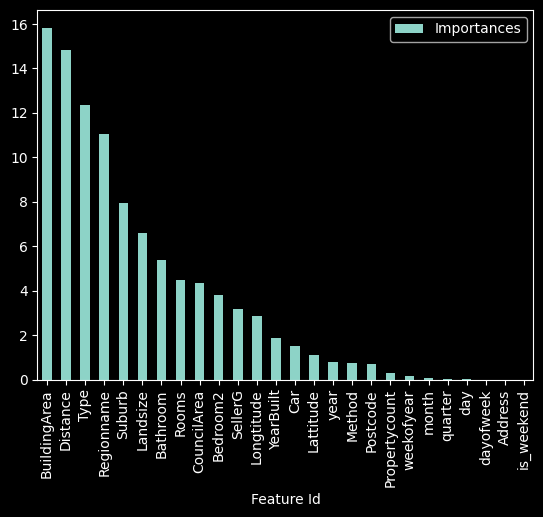

In [75]:
feature_importance.plot(kind='bar', x='Feature Id')

Address и is_weekend можно удалить из датасета, они никак не влияют на модель

In [76]:
len(train)

18373

In [77]:
X = ['Suburb', 'Rooms', 'Method', 'Type', 'SellerG',
     'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'CouncilArea', 'Regionname',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount', 'year', 'month', 'day',
       'dayofweek', 'quarter', 'weekofyear']
cat_features = ['Suburb', 'Method','Type', 'SellerG', 'CouncilArea', 'Regionname']
y = ['Price']

In [78]:
from sklearn.model_selection import train_test_split

Разобьем train на train и val подвыборки для обучения CatBoostRegressor

In [79]:
train, val = train_test_split(train, train_size=0.8, random_state=42, shuffle=True)

In [80]:
len(train)

14698

In [81]:
len(val)

3675

In [82]:
train_data = Pool(
    data=train[X],
    label=train[y],
    cat_features=cat_features
)

val_data = Pool(
    data=val[X],
    label=val[y],
    cat_features=cat_features
)

In [ ]:
params = {
    'iterations': 20000,
    'depth': 8,
    'loss_function': 'RMSE',
    'eval_metric': 'MAPE',
    'early_stopping_rounds': 500,
    'use_best_model': False,
    'bootstrap_type': 'Bayesian',
    'l2_leaf_reg': 6,
    # 'rsm': 0.8, 
    'bagging_temperature': 1.0,
    'verbose': 200,
    'learning_rate': 0.01,
    'random_seed': 42,
    'thread_count': -1,
    'task_type': 'GPU', 
    'devices': '0', 
    'grow_policy': 'Depthwise',  
    'max_bin': 254
}

In [84]:
model = CatBoostRegressor(**params)

In [85]:
model.fit(train_data, eval_set=val_data)

0:	learn: 0.5310352	test: 0.5254810	best: 0.5254810 (0)	total: 25.7ms	remaining: 8m 33s
200:	learn: 0.1874298	test: 0.1967251	best: 0.1967251 (200)	total: 2.33s	remaining: 3m 49s
400:	learn: 0.1473827	test: 0.1635126	best: 0.1635126 (400)	total: 4.42s	remaining: 3m 36s
600:	learn: 0.1380867	test: 0.1574362	best: 0.1574362 (600)	total: 6.36s	remaining: 3m 25s
800:	learn: 0.1331347	test: 0.1547614	best: 0.1547614 (800)	total: 8.16s	remaining: 3m 15s
1000:	learn: 0.1292961	test: 0.1530944	best: 0.1530944 (1000)	total: 9.96s	remaining: 3m 9s
1200:	learn: 0.1260454	test: 0.1518225	best: 0.1518225 (1200)	total: 11.8s	remaining: 3m 4s
1400:	learn: 0.1230449	test: 0.1509070	best: 0.1509070 (1400)	total: 13.6s	remaining: 3m
1600:	learn: 0.1203285	test: 0.1501844	best: 0.1501844 (1600)	total: 15.5s	remaining: 2m 58s
1800:	learn: 0.1176965	test: 0.1496484	best: 0.1496484 (1800)	total: 17.5s	remaining: 2m 56s
2000:	learn: 0.1150660	test: 0.1491983	best: 0.1491983 (2000)	total: 19.5s	remaining: 2m 

In [86]:
best_iter = model.get_best_iteration() + 1
best_iter

5293

In [87]:
train_full = pd.concat([train, val])

In [88]:
len(train_full)

18373

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14698 entries, 17574 to 15795
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         14698 non-null  object 
 1   Address        14698 non-null  object 
 2   Rooms          14698 non-null  int64  
 3   Type           14698 non-null  object 
 4   Price          14698 non-null  float64
 5   Method         14698 non-null  object 
 6   SellerG        14698 non-null  object 
 7   Distance       14698 non-null  float64
 8   Postcode       14698 non-null  float64
 9   Bedroom2       14698 non-null  float64
 10  Bathroom       14696 non-null  float64
 11  Car            14698 non-null  float64
 12  Landsize       14698 non-null  float64
 13  BuildingArea   14698 non-null  float64
 14  YearBuilt      14698 non-null  float64
 15  CouncilArea    14698 non-null  object 
 16  Lattitude      14698 non-null  float64
 17  Longtitude     14698 non-null  float64
 18  Regionn

In [90]:
len(train)

14698

In [91]:
len(val)

3675

In [92]:
train_data = Pool(data=train_full[X],
                  label=train_full[y],
                  cat_features=cat_features
                 )

In [ ]:
params = {
    'iterations': best_iter,
    'depth': 8,
    'loss_function': 'RMSE',
    'eval_metric': 'MAPE',
    'early_stopping_rounds': 500,
    'use_best_model': False,
    'bootstrap_type': 'Bayesian',
    'l2_leaf_reg': 6,
    # 'rsm': 0.8,
    'bagging_temperature': 1.0,
    'verbose': 200,
    'learning_rate': 0.01,
    'random_seed': 42,
    'thread_count': -1,
    'task_type': 'GPU', 
    'devices': '0', 
    'grow_policy': 'Depthwise',  
    'max_bin': 254
}

In [94]:
model = CatBoostRegressor(**params)

In [95]:
model.fit(train_data)

0:	learn: 0.5305202	total: 15.1ms	remaining: 1m 19s
200:	learn: 0.1876739	total: 2.32s	remaining: 58.8s
400:	learn: 0.1484808	total: 4.38s	remaining: 53.4s
600:	learn: 0.1396080	total: 6.26s	remaining: 48.9s
800:	learn: 0.1348899	total: 8.08s	remaining: 45.3s
1000:	learn: 0.1313492	total: 9.86s	remaining: 42.3s
1200:	learn: 0.1283096	total: 11.6s	remaining: 39.7s
1400:	learn: 0.1255838	total: 13.5s	remaining: 37.5s
1600:	learn: 0.1230261	total: 15.4s	remaining: 35.4s
1800:	learn: 0.1206828	total: 17.3s	remaining: 33.5s
2000:	learn: 0.1183688	total: 19.2s	remaining: 31.6s
2200:	learn: 0.1161152	total: 21.2s	remaining: 29.7s
2400:	learn: 0.1139106	total: 23.1s	remaining: 27.9s
2600:	learn: 0.1117681	total: 25.1s	remaining: 26s
2800:	learn: 0.1096194	total: 27.2s	remaining: 24.2s
3000:	learn: 0.1074849	total: 29.3s	remaining: 22.3s
3200:	learn: 0.1055382	total: 31.4s	remaining: 20.5s
3400:	learn: 0.1035546	total: 33.5s	remaining: 18.6s
3600:	learn: 0.1016872	total: 35.7s	remaining: 16.8s


In [96]:
y_pred = model.predict(train_full[X])

In [97]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [98]:
r2_score(train_full[y], y_pred)

0.9539916355493188

In [99]:
mean_absolute_percentage_error(train_full[y], y_pred)

0.08985004666599031

In [100]:
test = pd.read_csv('/kaggle/input/leopard-challenge-regression/test.csv')
test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.0,3067.0,NaN,...,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,30130
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.0,3067.0,3.0,...,NaN,192.0,109.0,1900.0,Yarra City Council,-37.80792,144.99508,Northern Metropolitan,4019.0,18311
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.0,3067.0,3.0,...,1.0,159.0,93.0,1890.0,Yarra City Council,-37.80124,144.99459,Northern Metropolitan,4019.0,18934
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.4,3042.0,3.0,...,5.0,536.0,108.0,1980.0,Moonee Valley City Council,-37.72285,144.87539,Western Metropolitan,3464.0,1824
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.4,3042.0,3.0,...,1.0,NaN,130.0,2009.0,Moonee Valley City Council,-37.71754,144.87704,Western Metropolitan,3464.0,31339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,Yarraville,13 Burns St,4,h,PI,Jas,24/02/2018,6.3,3013.0,4.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,11120
8814,Yarraville,29A Murray St,2,h,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,3950
8815,Yarraville,147A Severn St,2,t,S,Jas,24/02/2018,6.3,3013.0,2.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,2209
8816,Yarraville,12/37 Stephen St,3,h,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,23872


In [101]:
def preprocess(df):
    df = df.copy()

    df['Date'] = pd.to_datetime(df['Date'].apply(str).str.strip(), 
                               dayfirst=True, errors='coerce', infer_datetime_format=True)

    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['is_weekend'] = (df['Date'].dt.dayofweek >= 5).astype(int)
    df['quarter'] = df['Date'].dt.quarter
    df['weekofyear'] = df['Date'].dt.isocalendar().week.astype(int)
    
    df = df.drop('Date', axis=1)
    df['BuildingArea'] = df.groupby(by=['Type', 'Rooms'])['BuildingArea'].transform(lambda x: x.fillna(x.median()))
    df['BuildingArea'] = df.groupby('Type')['BuildingArea'].transform(lambda x: x.fillna(x.median()))
    df['YearBuilt'] = df.groupby('Suburb')['YearBuilt'].transform(lambda x: x.fillna(x.median()))
    df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())
    df['Landsize'] = df.groupby(['Suburb', 'Type'])['Landsize'].transform(lambda x: x.fillna(x.median()))
    df['Landsize'] = df['Landsize'].fillna(df['Landsize'].median())
    df['Car'] = df.groupby(['Type', 'Rooms'])['Car'].transform(lambda x: x.fillna(x.median()))
    df['Car'] = df['Car'].fillna(df['Car'].median())
    df['Bathroom'] = df.groupby(['Type', 'Rooms'])['Bathroom'].transform(lambda x: x.fillna(x.median()))
    df['Bedroom2'] = df.groupby(['Type', 'Rooms'])['Bedroom2'].transform(lambda x: x.fillna(x.median()))
    df['Bedroom2'] = df['Bedroom2'].fillna(df['Bedroom2'].median())
    df['Lattitude'] = df.groupby(['Suburb', 'Postcode'])['Lattitude'].transform(lambda x: x.fillna(x.mean()))
    df['Longtitude'] = df.groupby(['Suburb', 'Postcode'])['Longtitude'].transform(lambda x: x.fillna(x.mean()))
    df['Lattitude'] = df.groupby(['Suburb'])['Lattitude'].transform(lambda x: x.fillna(x.mean()))
    df['Longtitude'] = df.groupby(['Suburb'])['Longtitude'].transform(lambda x: x.fillna(x.mean()))
    df['Lattitude'] = df.groupby(['Distance'])['Lattitude'].transform(lambda x: x.fillna(x.mean()))
    df['Longtitude'] = df.groupby(['Distance'])['Longtitude'].transform(lambda x: x.fillna(x.mean()))
    df['Lattitude'] = df['Lattitude'].fillna(df['Lattitude'].mean())
    df['Longtitude'] = df['Longtitude'].fillna(df['Longtitude'].mean())
    for col in ['CouncilArea', 'Regionname']:
        df[col] = df[col].fillna('missing').astype(str)
    
    df['Propertycount'] = df['Propertycount'].fillna(df['Propertycount'].median())

    return df

In [102]:
test = preprocess(test)

/tmp/ipykernel_254/2156374768.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'].apply(str).str.strip(),


In [103]:
y_pred = model.predict(test[X])

In [104]:
sample_submission = pd.read_csv('/kaggle/input/leopard-challenge-regression/sample_submission.csv')
sample_submission

,id,Price
0,30130,0
1,18311,0
2,18934,0
3,1824,0
4,31339,0
...,...,...
8813,11120,0
8814,3950,0
8815,2209,0
8816,23872,0


In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8818 non-null   object 
 1   Address        8818 non-null   object 
 2   Rooms          8818 non-null   int64  
 3   Type           8818 non-null   object 
 4   Method         8818 non-null   object 
 5   SellerG        8818 non-null   object 
 6   Distance       8817 non-null   float64
 7   Postcode       8817 non-null   float64
 8   Bedroom2       8818 non-null   float64
 9   Bathroom       8818 non-null   float64
 10  Car            8818 non-null   float64
 11  Landsize       8818 non-null   float64
 12  BuildingArea   8818 non-null   float64
 13  YearBuilt      8818 non-null   float64
 14  CouncilArea    8818 non-null   object 
 15  Lattitude      8818 non-null   float64
 16  Longtitude     8818 non-null   float64
 17  Regionname     8818 non-null   object 
 18  Property

In [106]:
sample_submission['Price'] = y_pred

In [107]:
sample_submission

,id,Price
0,30130,1.109876e+06
1,18311,1.481382e+06
2,18934,1.360504e+06
3,1824,8.574978e+05
4,31339,8.751414e+05
...,...,...
8813,11120,1.366453e+06
8814,3950,8.002810e+05
8815,2209,6.575945e+05
8816,23872,1.169028e+06


In [108]:
sample_submission.to_csv('submission.csv', index=False)

In [109]:
subm = pd.read_csv('/kaggle/working/submission.csv')
subm

,id,Price
0,30130,1.109876e+06
1,18311,1.481382e+06
2,18934,1.360504e+06
3,1824,8.574978e+05
4,31339,8.751414e+05
...,...,...
8813,11120,1.366453e+06
8814,3950,8.002810e+05
8815,2209,6.575945e+05
8816,23872,1.169028e+06


---

# Попробуем использовать подбор гиперпараметров чтобы улучшить итоговый скор

In [110]:
! pip install optuna

In [111]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [112]:
train_full

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Regionname,Propertycount,id,year,month,day,dayofweek,is_weekend,quarter,weekofyear
17574,Melton West,1 Lincoln Wy,4,h,430000.0,SP,hockingstuart,31.7,3337.0,4.0,...,Northern Victoria,6065.0,7951,2017,9,23,5,1,3,38
3780,Gowanbrae,42 Seggan Cir,3,h,485000.0,S,Nelson,13.6,3043.0,3.0,...,Western Metropolitan,1071.0,26112,2016,4,16,5,1,2,15
5222,Moonee Ponds,5/3 Lennox St,2,u,420000.0,VB,Nelson,6.9,3039.0,2.0,...,Western Metropolitan,6232.0,25425,2016,9,10,5,1,3,36
3595,Glen Iris,1687 Malvern Rd,3,h,2800000.0,S,Greg,9.2,3146.0,3.0,...,Southern Metropolitan,10412.0,25441,2016,7,26,1,0,3,30
11103,Canterbury,108/2 Gascoyne St,2,u,816000.0,S,Nelson,8.4,3126.0,2.0,...,Southern Metropolitan,3265.0,3360,2017,7,1,5,1,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,Port Melbourne,41 Dunstan Pde,3,h,1305000.0,S,Marshall,3.8,3207.0,2.0,...,Southern Metropolitan,8648.0,9054,2016,5,22,6,1,2,20
14261,Toorak,3/716 Orrong Rd,3,u,1860000.0,S,Scott,4.1,3142.0,3.0,...,Southern Metropolitan,7217.0,20830,2017,8,12,5,1,3,32
9790,Clifton Hill,101/51 Ramsden St,1,u,538000.0,S,Jellis,3.4,3068.0,1.0,...,Northern Metropolitan,2954.0,22252,2017,4,8,5,1,2,14
12863,Vermont South,3 Reynella Cl,4,h,1400000.0,PI,Jellis,17.2,3133.0,4.0,...,Eastern Metropolitan,4280.0,15377,2017,6,24,5,1,2,25


Параметры для Optuna для задач регрессии

In [ ]:

def objective(trial):
    params = {
        'iterations': 6000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'depth': trial.suggest_int('depth', 5, 8),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 9.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.5, 2.0),
        # 'rsm': trial.suggest_float('rsm', 0.7, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.8, 2.0),
        'bootstrap_type': 'Bayesian',
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 200, 600),
        'loss_function': 'RMSE',
        'eval_metric': 'MAPE',
        'od_type': 'Iter',
        'verbose': 0,
        'random_seed': 42,
        'thread_count': -1,
        'cat_features': cat_features,
        'task_type': 'GPU', 
        'devices': '0', 
        'grow_policy': 'Depthwise', 
        'max_bin': 254
    }

    model = CatBoostRegressor(**params)

    score = -cross_val_score(
        model,
        train_full[X],
        train_full[y],
        scoring='neg_mean_absolute_percentage_error',
        cv=2, 
        n_jobs=1
    ).mean()

    return score

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14698 entries, 17574 to 15795
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         14698 non-null  object 
 1   Address        14698 non-null  object 
 2   Rooms          14698 non-null  int64  
 3   Type           14698 non-null  object 
 4   Price          14698 non-null  float64
 5   Method         14698 non-null  object 
 6   SellerG        14698 non-null  object 
 7   Distance       14698 non-null  float64
 8   Postcode       14698 non-null  float64
 9   Bedroom2       14698 non-null  float64
 10  Bathroom       14696 non-null  float64
 11  Car            14698 non-null  float64
 12  Landsize       14698 non-null  float64
 13  BuildingArea   14698 non-null  float64
 14  YearBuilt      14698 non-null  float64
 15  CouncilArea    14698 non-null  object 
 16  Lattitude      14698 non-null  float64
 17  Longtitude     14698 non-null  float64
 18  Regionn

In [128]:
val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3675 entries, 14655 to 2478
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         3675 non-null   object 
 1   Address        3675 non-null   object 
 2   Rooms          3675 non-null   int64  
 3   Type           3675 non-null   object 
 4   Price          3675 non-null   float64
 5   Method         3675 non-null   object 
 6   SellerG        3675 non-null   object 
 7   Distance       3675 non-null   float64
 8   Postcode       3675 non-null   float64
 9   Bedroom2       3675 non-null   float64
 10  Bathroom       3675 non-null   float64
 11  Car            3675 non-null   float64
 12  Landsize       3675 non-null   float64
 13  BuildingArea   3675 non-null   float64
 14  YearBuilt      3675 non-null   float64
 15  CouncilArea    3675 non-null   object 
 16  Lattitude      3675 non-null   float64
 17  Longtitude     3675 non-null   float64
 18  Regionnam

Очистим буфер видюхи, лучше делать каждый раз перед каждым новым обучением моделей на GPU

In [129]:
import gc

try:
    import torch
    torch.cuda.empty_cache()
except ImportError:
    pass

gc.collect()

30

In [130]:
study = optuna.create_study(direction='minimize', study_name='catboost_mape')
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-11-12 12:51:34,790] A new study created in memory with name: catboost_mape


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-11-12 12:53:15,755] Trial 0 finished with value: 0.15411312331962218 and parameters: {'learning_rate': 0.051768277415695486, 'depth': 7, 'l2_leaf_reg': 8.40568613446051, 'bagging_temperature': 1.3251563144247618, 'random_strength': 1.3356496165499385, 'early_stopping_rounds': 341}. Best is trial 0 with value: 0.15411312331962218.
[I 2025-11-12 12:55:34,971] Trial 1 finished with value: 0.1505471398199212 and parameters: {'learning_rate': 0.016188132929517356, 'depth': 8, 'l2_leaf_reg': 1.0230275704060923, 'bagging_temperature': 1.1081355374194113, 'random_strength': 0.8532176065317899, 'early_stopping_rounds': 483}. Best is trial 1 with value: 0.1505471398199212.
[I 2025-11-12 12:57:46,294] Trial 2 finished with value: 0.1505770534752347 and parameters: {'learning_rate': 0.014202244980899042, 'depth': 8, 'l2_leaf_reg': 4.826027604364651, 'bagging_temperature': 0.5564171302570367, 'random_strength': 1.5757426059812722, 'early_stopping_rounds': 407}. Best is trial 1 with value: 0

In [131]:
print("Лучшие параметры:", study.best_params)
print("Лучший MAPE:", study.best_value)

Лучшие параметры: {'learning_rate': 0.011646179941743393, 'depth': 8, 'l2_leaf_reg': 3.6590030644358533, 'bagging_temperature': 0.5245541548894792, 'random_strength': 0.9706011458780638, 'early_stopping_rounds': 482}
Лучший MAPE: 0.1498755498086899


In [132]:
import gc

try:
    import torch
    torch.cuda.empty_cache()
except ImportError:
    pass

gc.collect()

178

In [133]:
train_pool = Pool(
    data=train[X],
    label=train[y],
    cat_features=cat_features
)

val_pool = Pool(
    data=val[X],
    label=val[y],
    cat_features=cat_features
)

In [134]:
best_params = study.best_params.copy()
best_params.update({
    'iterations': 6000,
    'loss_function': 'RMSE',
    'eval_metric': 'MAPE',
    'bootstrap_type': 'Bayesian',
    'verbose': 200,
    'task_type': 'GPU',
    'devices': '0',
    'grow_policy': 'Depthwise',
    'max_bin': 254,
    'random_seed': 42,
    'cat_features': cat_features
})

model = CatBoostRegressor(**best_params)
model.fit(train_pool, eval_set=val_pool)

0:	learn: 0.5302304	test: 0.5246765	best: 0.5246765 (0)	total: 12.9ms	remaining: 1m 17s
200:	learn: 0.1687981	test: 0.1821254	best: 0.1821254 (200)	total: 2.39s	remaining: 1m 9s
400:	learn: 0.1375632	test: 0.1586949	best: 0.1586949 (400)	total: 4.49s	remaining: 1m 2s
600:	learn: 0.1294221	test: 0.1542402	best: 0.1542402 (600)	total: 6.39s	remaining: 57.4s
800:	learn: 0.1237085	test: 0.1516710	best: 0.1516660 (799)	total: 8.24s	remaining: 53.5s
1000:	learn: 0.1190806	test: 0.1500467	best: 0.1500467 (1000)	total: 10.1s	remaining: 50.6s
1200:	learn: 0.1148493	test: 0.1489926	best: 0.1489926 (1200)	total: 12.2s	remaining: 48.7s
1400:	learn: 0.1109399	test: 0.1482500	best: 0.1482500 (1400)	total: 14.2s	remaining: 46.5s
1600:	learn: 0.1074880	test: 0.1478727	best: 0.1478662 (1596)	total: 16.2s	remaining: 44.4s
1800:	learn: 0.1040400	test: 0.1474459	best: 0.1474384 (1792)	total: 18.2s	remaining: 42.4s
2000:	learn: 0.1007540	test: 0.1472444	best: 0.1472341 (1967)	total: 20.2s	remaining: 40.4s


In [135]:
print("Лучшая итерация:", model.best_iteration_)

Лучшая итерация: 3305


In [136]:
best_iter = model.best_iteration_

In [138]:
best_params.update({
    'iterations': best_iter + 1
})
best_params

{'learning_rate': 0.011646179941743393,
 'depth': 8,
 'l2_leaf_reg': 3.6590030644358533,
 'bagging_temperature': 0.5245541548894792,
 'random_strength': 0.9706011458780638,
 'early_stopping_rounds': 482,
 'iterations': 3306,
 'loss_function': 'RMSE',
 'eval_metric': 'MAPE',
 'bootstrap_type': 'Bayesian',
 'verbose': 200,
 'task_type': 'GPU',
 'devices': '0',
 'grow_policy': 'Depthwise',
 'max_bin': 254,
 'random_seed': 42,
 'cat_features': ['Suburb',
  'Method',
  'Type',
  'SellerG',
  'CouncilArea',
  'Regionname']}

In [139]:
train_full_pool = Pool(data=train_full[X],
                  label=train_full[y],
                  cat_features=cat_features
                 )

In [140]:
model = CatBoostRegressor(**best_params)
model.fit(train_full_pool)

0:	learn: 0.5297029	total: 13.6ms	remaining: 44.9s
200:	learn: 0.1698527	total: 2.33s	remaining: 35.9s
400:	learn: 0.1391666	total: 4.41s	remaining: 32s
600:	learn: 0.1313479	total: 6.2s	remaining: 27.9s
800:	learn: 0.1263777	total: 8.04s	remaining: 25.1s
1000:	learn: 0.1222807	total: 9.93s	remaining: 22.9s
1200:	learn: 0.1185350	total: 11.8s	remaining: 20.7s
1400:	learn: 0.1150358	total: 13.9s	remaining: 18.8s
1600:	learn: 0.1116915	total: 15.8s	remaining: 16.9s
1800:	learn: 0.1085044	total: 17.9s	remaining: 14.9s
2000:	learn: 0.1054555	total: 19.9s	remaining: 13s
2200:	learn: 0.1025919	total: 22s	remaining: 11s
2400:	learn: 0.0997614	total: 24s	remaining: 9.06s
2600:	learn: 0.0971586	total: 26.1s	remaining: 7.08s
2800:	learn: 0.0946424	total: 28.3s	remaining: 5.1s
3000:	learn: 0.0919544	total: 30.4s	remaining: 3.09s
3200:	learn: 0.0895264	total: 32.5s	remaining: 1.07s
3305:	learn: 0.0883362	total: 33.6s	remaining: 0us


In [142]:
test_pool = Pool(test[X], cat_features=cat_features)

In [143]:
y_pred = model.predict(test[X])

In [144]:
sample_submission['Price'] = y_pred
sample_submission

,id,Price
0,30130,1.029532e+06
1,18311,1.490607e+06
2,18934,1.348615e+06
3,1824,8.513305e+05
4,31339,8.774916e+05
...,...,...
8813,11120,1.400427e+06
8814,3950,8.170737e+05
8815,2209,6.810948e+05
8816,23872,1.152024e+06


In [145]:
sample_submission.to_csv('submission.csv', index=False)